# Simple SVM examples
Excecute the following examples to get a feeling for the SVM and how to use it with scikit-learn. We start with a random two dimensional data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

#### Creation of data
We create 2 times 100 data points as follows:

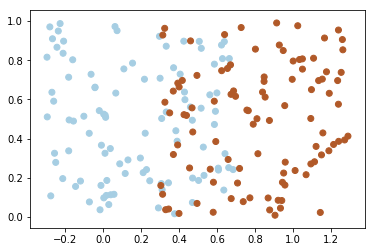

In [2]:
%matplotlib inline
np.random.seed(42)
y = np.concatenate((np.repeat(-1,100),np.repeat(1,100))) 
X = np.random.rand(200,2) 
X[:,0] += 0.3*y
np.shape(y)
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired)
plt.show()

#### Training and prediction using a SVM
Execute the following code and adpot the code to make predictions for a few other points. Does the result make sense?

In [3]:
C = 0.4
svc = svm.SVC(kernel='linear', C=C).fit(X,y)

In [4]:
svc.predict([(-0.4,1)])

array([-1])

#### Cross validation
Play around with the code below. Which parameter C gives the best leave-one-out cross validation error?

In [5]:
from sklearn import model_selection
C = 0.1
svc = svm.SVC(kernel='linear', C=C)
loo = model_selection.LeaveOneOut()
# svc.fit(...).score() gives 1 if prediction is correct 0 otherwise 
res = [svc.fit(X[train], y[train]).score(X[test], y[test]) for train, test in loo.split(X)]
#res is a vector with 0,1
np.mean(res) #The average accuracy

0.775

### Parameter Optimization
The following code is adapted from [here](https://github.com/robhowley/scikit-learn-tutorials/blob/master/model-selection.py) (originally from the scikit-learn repos) and shows how to systematically perform a parameter optimization. 

To do so, we split the data into a train and test set. First, we use the training set to find the parameters which give the best accuracy.
#### Finding the optimal parameter for the training set
We evaluate a linear and a RBF kernel with different parameters.

In [6]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

n_samples = len(y)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

score = 'accuracy'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                   scoring=score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
results = clf.cv_results_
for i in range(len(results["params"])):
    print("%0.3f (+/-%0.03f) for %r" % (results["mean_test_score"][i], results["std_test_score"][i] * 2, results["params"][i]))

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

Grid scores on development set:

0.790 (+/-0.228) for {'C': 1, 'kernel': 'linear'}
0.790 (+/-0.228) for {'C': 10, 'kernel': 'linear'}
0.810 (+/-0.218) for {'C': 100, 'kernel': 'linear'}
0.810 (+/-0.218) for {'C': 1000, 'kernel': 'linear'}
0.530 (+/-0.020) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.530 (+/-0.020) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.530 (+/-0.020) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.530 (+/-0.020) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.780 (+/-0.154) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.530 (+/-0.020) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.790 (+/-0.228) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.780 (+/-0.154) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


#### Evaluation of the optimal parameters on untouched test-set
We see that a SVM with a linear kernel is most appropriate. We now evaluate this parameters on the test-set which we did not touch so far. Since we did not touch the test set yet, this performance is a good proxy for new unseen data (if it comes from the same distribution).

In [7]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
np.mean(y_true == y_pred)

             precision    recall  f1-score   support

         -1       0.73      0.87      0.80        47
          1       0.86      0.72      0.78        53

avg / total       0.80      0.79      0.79       100



0.79